<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/2_Std_dataset_data_Analysis_of_merged_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Std_dataset data analysis and EDA

---

#LOAD LIBRARIES

In [ ]:

!pip install tensorflow
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import uniform, randint
import warnings

# Suppress user warnings
warnings.filterwarnings('ignore')

# Adjust settings to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


# LOAD THE DATA SETS

In [ ]:
# Import the required modules
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path to the saved CSV
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv2.csv'

# Load the dataset into a DataFrame
merged_dataset = pd.read_csv(file_path)

# Verify if the dataset has been loaded successfully
print("Dataset loaded successfully!")
print(f"Shape of the dataset: {merged_dataset.shape}")
print(f"First 5 rows of the dataset:\n{merged_dataset.head()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!
Shape of the dataset: (72663, 25)
First 5 rows of the dataset:
   saleable_area(ft^2)  unit_rate                       district  floor  CPI  \
0                  423      15792  Kowloon Kowloon City District   22.0    0   
1                  761      15857  Kowloon Kowloon City District   12.0    0   
2                  320      13717  Kowloon Kowloon City District   12.0    0   
3                  519      16541  Kowloon Kowloon City District   29.0    0   
4                  699      14721  Kowloon Kowloon City District   24.0    0   

    PC  IR  MW  M3  SD  UR  GDP  CI    HSI  LTV    HS  SOLD  PG  LS  \
0  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
1  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
2  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
3  351   3  18

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   saleable_area(ft^2)  72663 non-null  int64  
 1   unit_rate            72663 non-null  int64  
 2   district             72663 non-null  object 
 3   floor                72663 non-null  float64
 4   CPI                  72663 non-null  int64  
 5   PC                   72663 non-null  int64  
 6   IR                   72663 non-null  int64  
 7   MW                   72663 non-null  int64  
 8   M3                   72663 non-null  int64  
 9   SD                   72663 non-null  int64  
 10  UR                   72663 non-null  int64  
 11  GDP                  72663 non-null  int64  
 12  CI                   72663 non-null  int64  
 13  HSI                  72663 non-null  int64  
 14  LTV                  72663 non-null  int64  
 15  HS                   72663 non-null 

In [ ]:
# Get the files from GitHub raw URLs for the datasets
# dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Datasetv2.csv'
# property_dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Property_data_raw_2.csv'

# Read in the data sets
# dataset = pd.read_csv(dataset_url)
# property_dataset = pd.read_csv(property_dataset_url)

In [ ]:
# Get the files from GitHub raw URLs for the datasets
property_dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Property_data_raw_2.csv'

# Read in the data set
property_dataset = pd.read_csv(property_dataset_url)


# DATA ANALYSIS OF HONG KONG PROPERTY MARKET


In [ ]:

# Total propeties sold in HK Vs loaded DataFrame

# Filter the SOLD row (row where 'Unnamed: 0' is 'SOLD') and exclude the last 3 quarters
sold_row = property_dataset.loc[property_dataset['Unnamed: 0'] == 'SOLD'].iloc[0, 1:-3]  # Exclude last 3 columns (quarters)

# Sum the SOLD values excluding the last 3 quarters
adjusted_sold_sum = sold_row.sum()

# Get the total number of rows in merged_dataset
total_rows_merged_dataset = len(merged_dataset)

# Calculate the percentage (merged_dataset rows as a percentage of the adjusted SOLD sum)
percentage_merged_to_sold = (total_rows_merged_dataset / adjusted_sold_sum) * 100

# Print the results
print(f"Adjusted SOLD properties (excluding last 3 quarters): {adjusted_sold_sum}")
print(f"Total rows in 'merged_dataset': {total_rows_merged_dataset}")
print(f"Percentage of rows in 'merged_dataset' compared to adjusted SOLD properties: {percentage_merged_to_sold:.2f}%")

Adjusted SOLD properties (excluding last 3 quarters): 243585.0
Total rows in 'merged_dataset': 72663
Percentage of rows in 'merged_dataset' compared to adjusted SOLD properties: 29.83%


Based on the above, the number of properties recorded as sold by Govt is `243,585` but the using the sliimed down Centreline database we have `74,152` in the same period, so it does not record ALL the property transactions in that period - just 30.44%

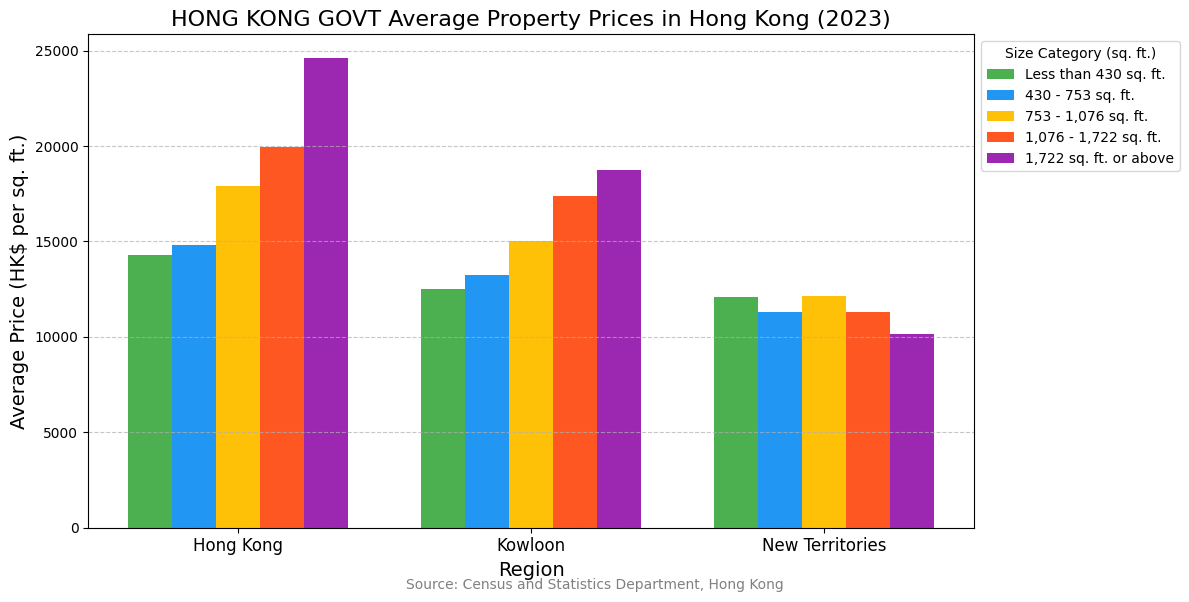

In [ ]:
# Govt data on area price and districts
# Data from the provided table
data = {
    "Type": [
        "Less than 430 sq. ft.",
        "Less than 430 sq. ft.",
        "Less than 430 sq. ft.",
        "430 - 753 sq. ft.",
        "430 - 753 sq. ft.",
        "430 - 753 sq. ft.",
        "753 - 1,076 sq. ft.",
        "753 - 1,076 sq. ft.",
        "753 - 1,076 sq. ft.",
        "1,076 - 1,722 sq. ft.",
        "1,076 - 1,722 sq. ft.",
        "1,076 - 1,722 sq. ft.",
        "1,722 sq. ft. or above",
        "1,722 sq. ft. or above",
        "1,722 sq. ft. or above",
    ],
    "Area/District": [
        "Hong Kong",
        "Kowloon",
        "New Territories",
        "Hong Kong",
        "Kowloon",
        "New Territories",
        "Hong Kong",
        "Kowloon",
        "New Territories",
        "Hong Kong",
        "Kowloon",
        "New Territories",
        "Hong Kong",
        "Kowloon",
        "New Territories",
    ],
    "2023": [
        14314, 12506, 12071,
        14831, 13223, 11315,
        17905, 15028, 12142,
        19972, 17393, 11302,
        24622, 18746, 10141,
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the data to organize it for plotting
pivot_df = df.pivot(index="Area/District", columns="Type", values="2023")

# Define the size categories and regions
size_categories = [
    "Less than 430 sq. ft.",
    "430 - 753 sq. ft.",
    "753 - 1,076 sq. ft.",
    "1,076 - 1,722 sq. ft.",
    "1,722 sq. ft. or above",
]
regions = ["Hong Kong", "Kowloon", "New Territories"]

# Bar position setup
x = np.arange(len(regions))  # Number of regions
bar_width = 0.15  # Width of each bar
offsets = np.arange(-2, 3) * bar_width  # Offsets for each size category

# Plot the data
plt.figure(figsize=(12, 6))

colors = ["#4CAF50", "#2196F3", "#FFC107", "#FF5722", "#9C27B0"]  # Colors for size categories

for i, size_category in enumerate(size_categories):
    plt.bar(
        x + offsets[i],
        pivot_df[size_category],  # Use the pivoted data for the specific size category
        width=bar_width,
        color=colors[i],
        label=size_category,
    )

# Add labels and legend
plt.title("HONG KONG GOVT Average Property Prices in Hong Kong (2023)", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Average Price (HK$ per sq. ft.)", fontsize=14)
plt.xticks(x, regions, fontsize=12)
plt.legend(title="Size Category (sq. ft.)", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add source at the bottom of the graph
plt.figtext(
    0.5, 0.01,  # Position: centered horizontally (0.5), near the bottom (0.01)
    "Source: Census and Statistics Department, Hong Kong",
    ha="center",  # Horizontal alignment
    fontsize=10,
    color="gray",
)

plt.tight_layout()

# Show the plot
plt.show()

### Distribution of Sold Private Properties from the `Merged_Datasetv2.csv`

In [ ]:
merged_dataset.head()

saleable_area(ft^2)  unit_rate                       district  floor  CPI  \
0                  423      15792  Kowloon Kowloon City District   22.0    0   
1                  761      15857  Kowloon Kowloon City District   12.0    0   
2                  320      13717  Kowloon Kowloon City District   12.0    0   
3                  519      16541  Kowloon Kowloon City District   29.0    0   
4                  699      14721  Kowloon Kowloon City District   24.0    0   

    PC  IR  MW  M3  SD  UR  GDP  CI    HSI  LTV    HS  SOLD  PG  LS  \
0  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
1  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
2  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
3  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
4  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   

  FormattedDate  new_price YearQuarter region  floor_height     floor_size  
0    2023-03-08    6680016      2023Q1    KLN  floor_21to25    small400600  
1    2023-03-08   12067177      2023Q1    KLN  floor_11to13  compact600800  
2    2023-03-08    4389440      2023Q1    KLN  floor_11to13    micro200400  
3    2023-03-08    8584779      2023Q1    KLN  floor_26to30    small400600  
4    2023-03-08   10289979      2023Q1    KLN  floor_21to25  compact600800

In [ ]:
#Central line
merged_dataset.groupby('YearQuarter')['unit_rate'].count()

YearQuarter
2021Q1     1531
2021Q2     3626
2021Q3     5421
2021Q4     6272
2022Q1     4785
2022Q2     9384
2022Q3    11415
2022Q4    13276
2023Q1    16953
Name: unit_rate, dtype: int64

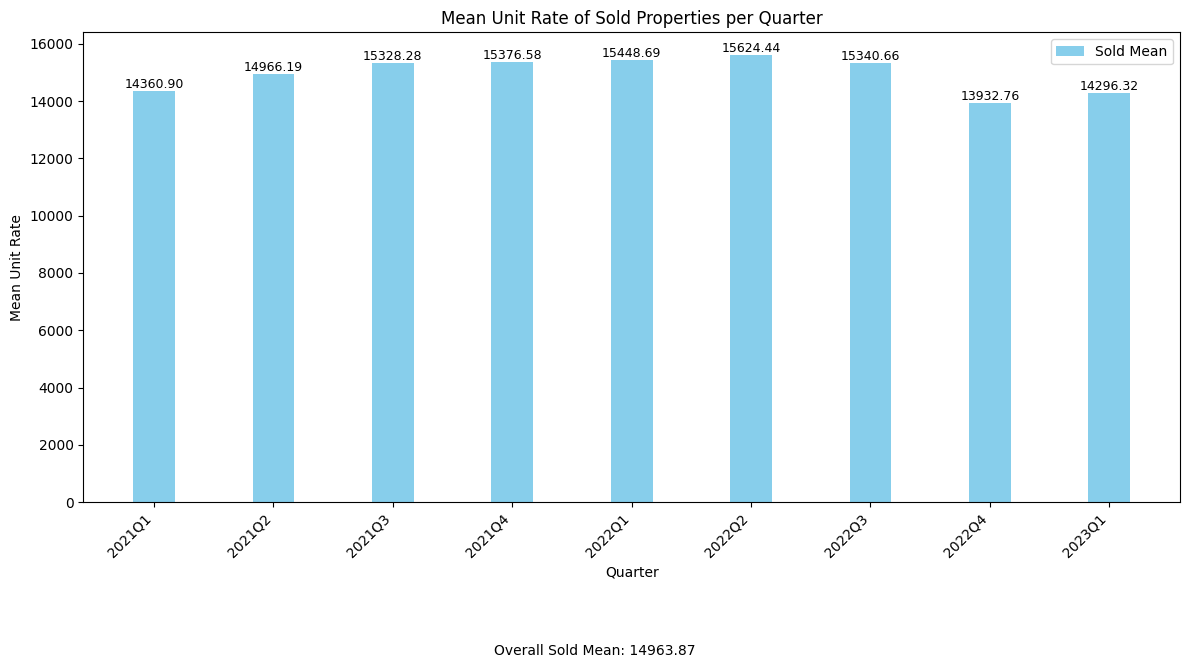

In [ ]:
# Group by YearQuarter and calculate mean of unit rates
sold_mean = merged_dataset.groupby('YearQuarter')['unit_rate'].mean()

# Create a DataFrame for the mean unit rates
unit_rates_summary = pd.DataFrame({
    'Sold Mean': sold_mean
}).fillna(0)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Define the positions of the bars
index = np.arange(len(unit_rates_summary))

# Plot the bars
bar1 = ax.bar(index, unit_rates_summary['Sold Mean'], bar_width, label='Sold Mean', color='skyblue')

# Adding labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Mean Unit Rate')
ax.set_title('Mean Unit Rate of Sold Properties per Quarter')

# Set the x-ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(unit_rates_summary.index.astype(str), rotation=45, ha='right')

# Adding a legend
ax.legend()

# Display mean values as numbers on the bars
for i in range(len(index)):
    ax.text(index[i], unit_rates_summary['Sold Mean'][i] + 0.01,
            f'{unit_rates_summary["Sold Mean"][i]:.2f}',
            ha='center', va='bottom', fontsize=9)

# Calculate the overall mean
sold_overall_mean = sold_mean.mean()

# Display overall average below the graph
plt.figtext(0.5, -0.1, f"Overall Sold Mean: {sold_overall_mean:.2f}", ha='center', fontsize=10)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

## Properties sold by size

In [ ]:
merged_dataset.groupby(['YearQuarter', 'floor_size']).size().unstack()
#.size().unstack(fill_value=0)+

floor_size   compact600800  large10001300  medium8001000  micro200400  \
YearQuarter                                                             
2021Q1                 272             15             74          341   
2021Q2                 636             18            134          906   
2021Q3                 743              5            156         1773   
2021Q4                 823             12            161         2175   
2022Q1                 777             15            133         1301   
2022Q2                1333             42            282         2740   
2022Q3                1424             39            240         4167   
2022Q4                1984             68            325         4541   
2023Q1                2677             54            408         5468   

floor_size   nano0200  small400600  
YearQuarter                         
2021Q1              2          827  
2021Q2              9         1923  
2021Q3             17         2727  
2021Q4             16         3085  
2022Q1             10         2549  
2022Q2             30         4957  
2022Q3             79         5466  
2022Q4             67         6291  
2023Q1             23         8323

<Figure size 1200x1000 with 0 Axes>

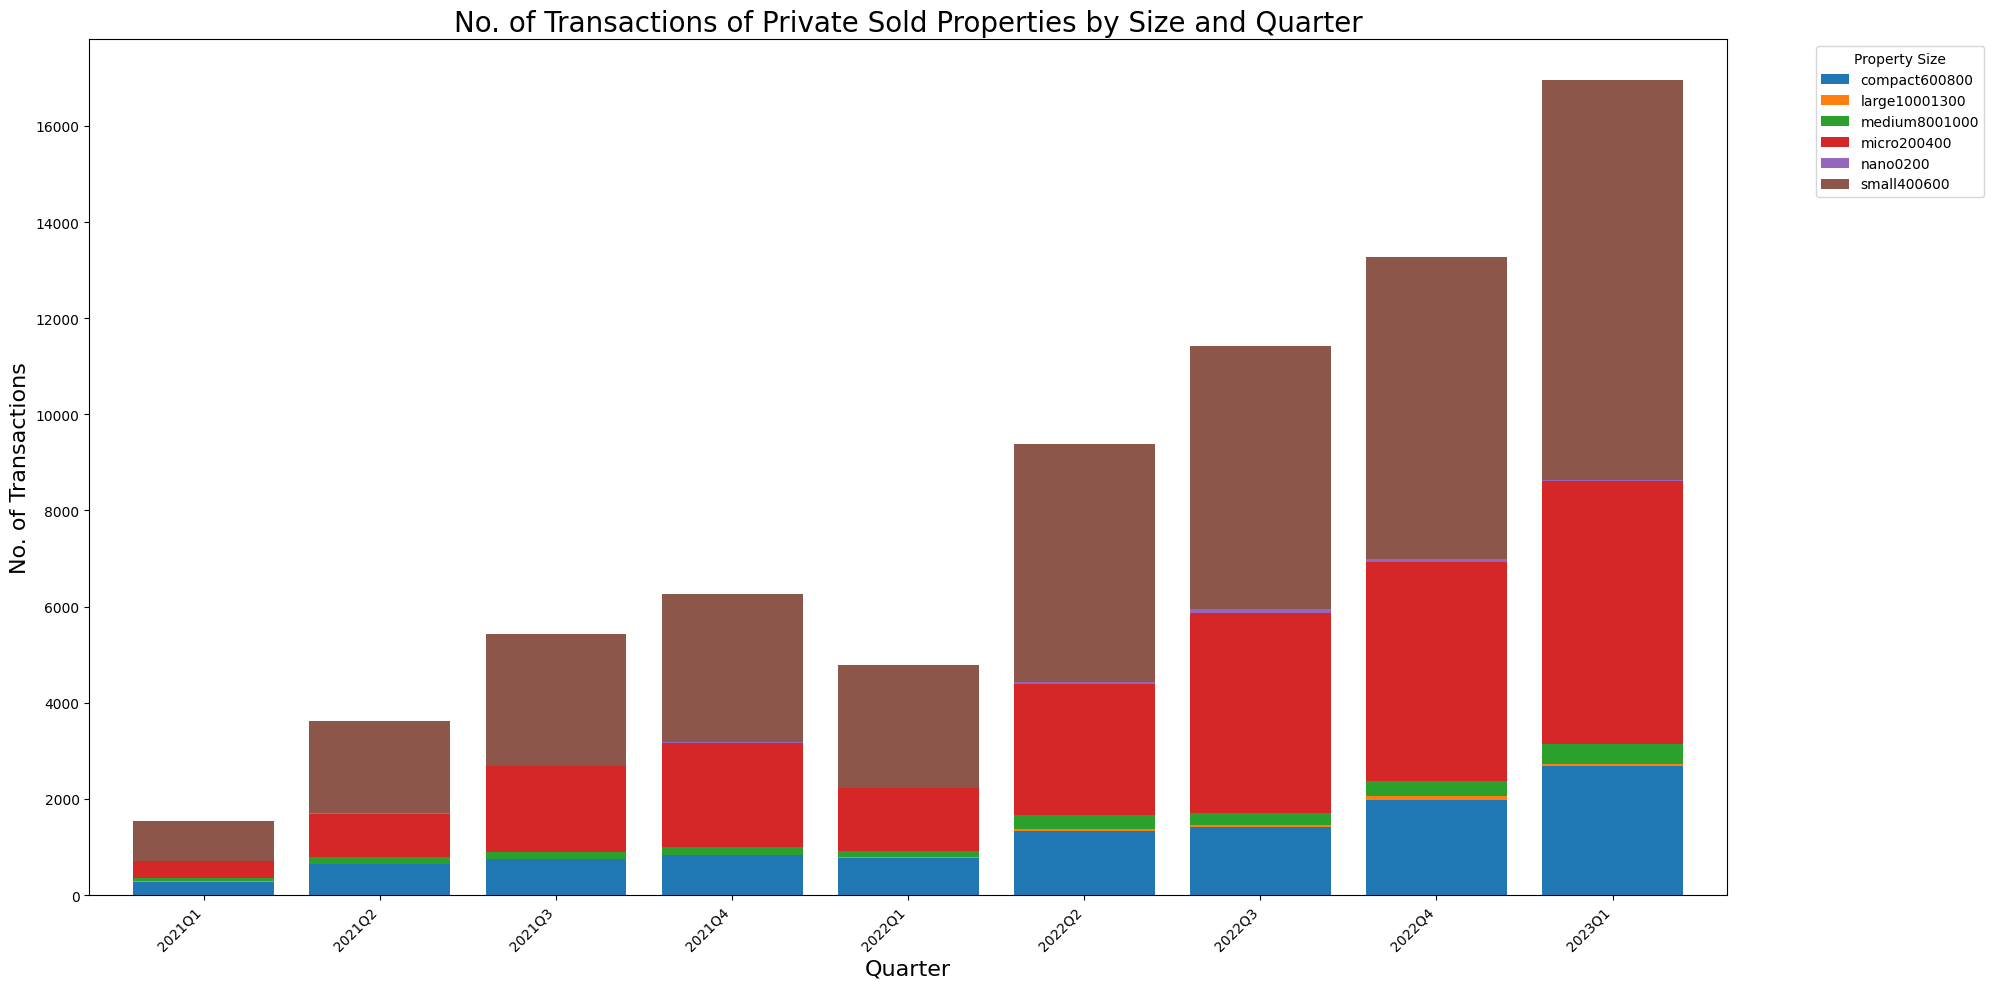

In [ ]:
# Group by YearQuarter and property_size, then count transactions
transaction_counts = merged_dataset.groupby(['YearQuarter', 'floor_size']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 10))  # Increased figure width
ax = transaction_counts.plot(kind='bar', stacked=True, figsize=(20, 10), width=0.8)  # Increased bar width

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by Size and Quarter', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('No. of Transactions', fontsize=16)
plt.legend(title='Property Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show();

## Consider property size and unit rate for sold properties.

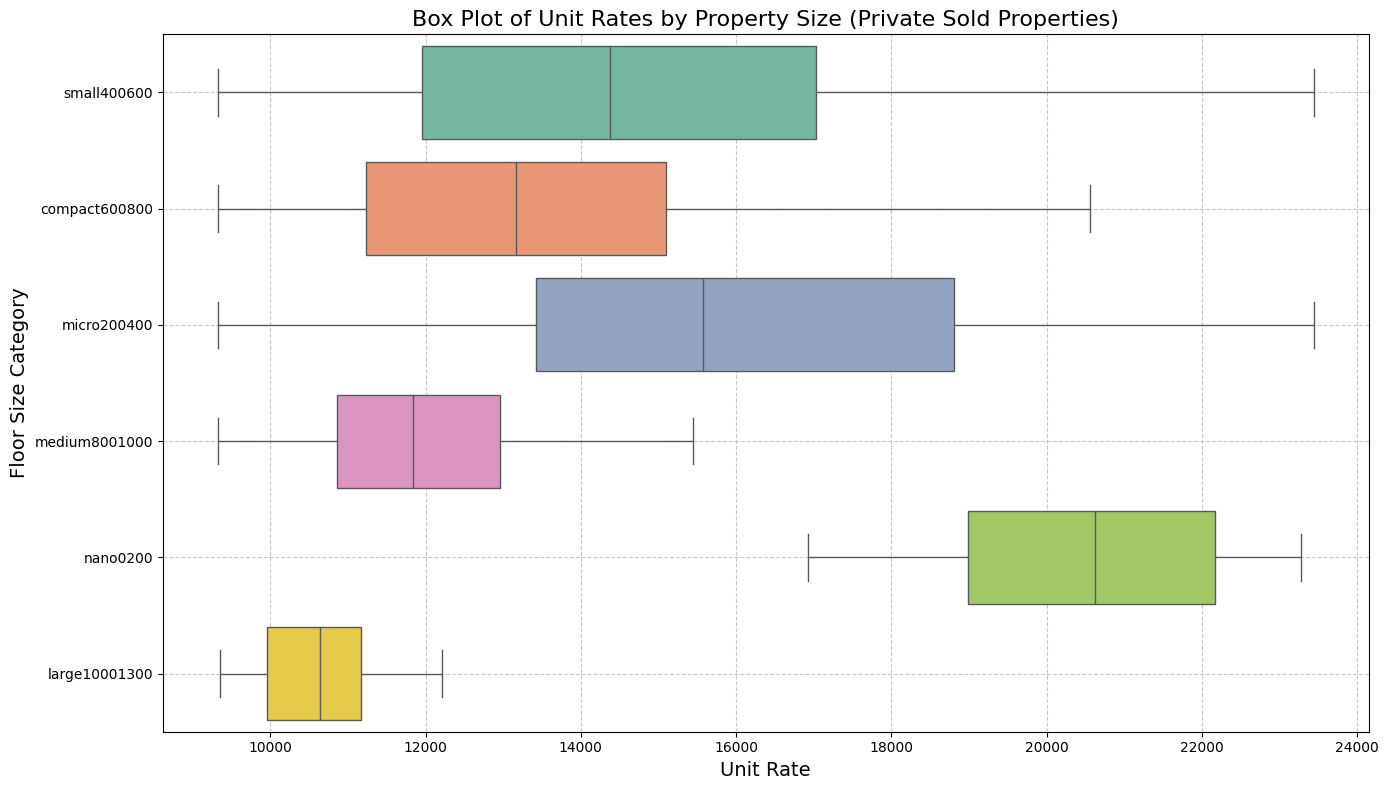

In [ ]:
# Plotting the box plot with updated syntax for future compatibility
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Replace 'private_sold' with 'merged_dataset'
sns.boxplot(x='unit_rate', y='floor_size', data=merged_dataset, palette='Set2', hue=None, dodge=False)

# Customizing the plot
plt.title('Box Plot of Unit Rates by Property Size (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=14)
plt.ylabel('Floor Size Category', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Mean Unit rate price per square foot Movement of Sold Property Sizes by Quarter

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   saleable_area(ft^2)  72663 non-null  int64  
 1   unit_rate            72663 non-null  int64  
 2   district             72663 non-null  object 
 3   floor                72663 non-null  float64
 4   CPI                  72663 non-null  int64  
 5   PC                   72663 non-null  int64  
 6   IR                   72663 non-null  int64  
 7   MW                   72663 non-null  int64  
 8   M3                   72663 non-null  int64  
 9   SD                   72663 non-null  int64  
 10  UR                   72663 non-null  int64  
 11  GDP                  72663 non-null  int64  
 12  CI                   72663 non-null  int64  
 13  HSI                  72663 non-null  int64  
 14  LTV                  72663 non-null  int64  
 15  HS                   72663 non-null 

In [ ]:
# Display unique floor_size categories in the dataset
unique_floor_sizes = merged_dataset['floor_size'].unique()
print("Unique floor_size categories in the dataset:")
print(unique_floor_sizes)

# Alternatively, display the count of each floor_size category
floor_size_counts = merged_dataset['floor_size'].value_counts()
print("\nCount of each floor_size category in the dataset:")
print(floor_size_counts)

Unique floor_size categories in the dataset:
['small400600', 'compact600800', 'micro200400', 'medium8001000', 'nano0200', 'large10001300']
Categories (12, object): ['unknown' < 'nano0200' < 'micro200400' < 'small400600' ... 'xxl16002000' <
                          'premium20002500' < 'luxury25003000' < 'ultralux3000plus']

Count of each floor_size category in the dataset:
floor_size
small400600         36148
micro200400         23412
compact600800       10669
medium8001000        1913
large10001300         268
nano0200              253
unknown                 0
xl13001600              0
xxl16002000             0
premium20002500         0
luxury25003000          0
ultralux3000plus        0
Name: count, dtype: int64


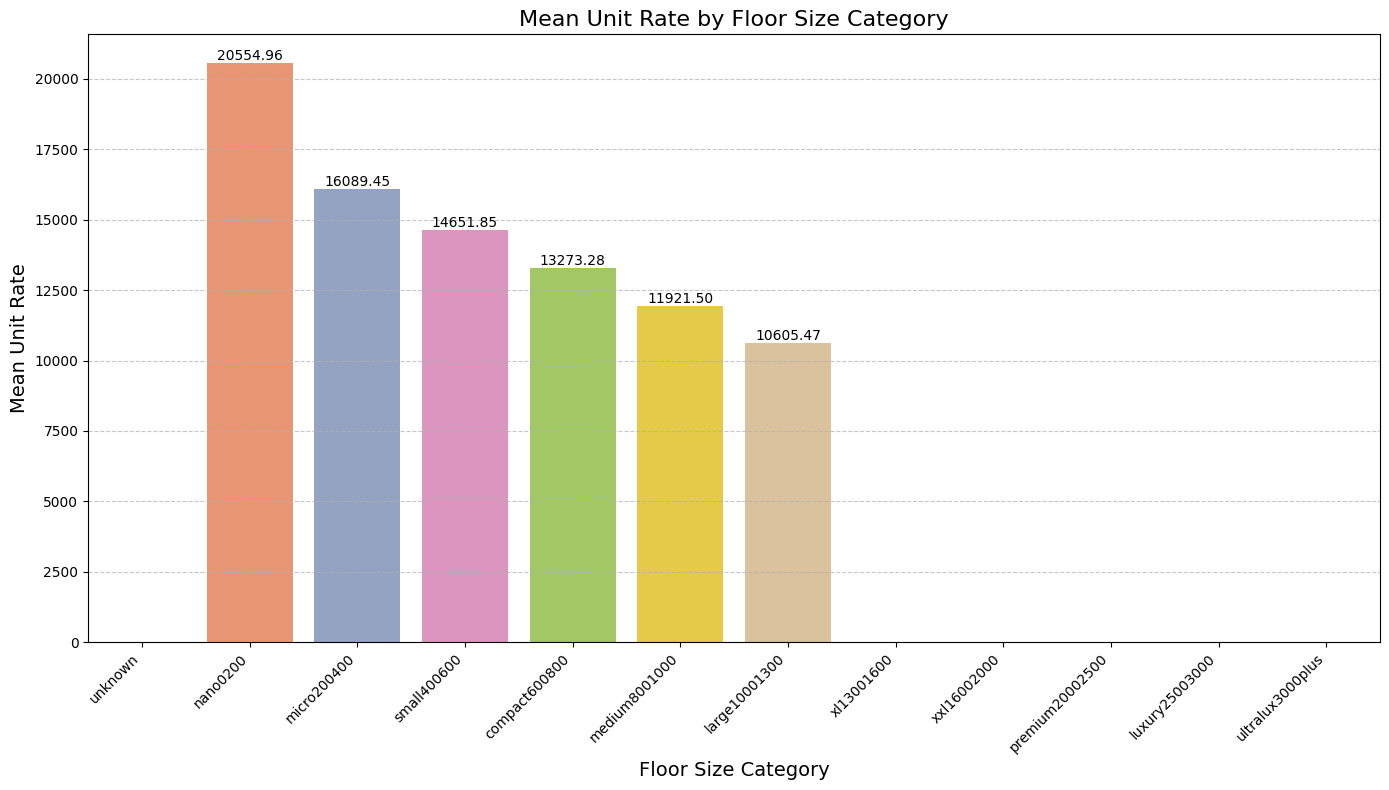

In [ ]:

# Drop rows where unit_rate or floor_size is NaN
merged_dataset = merged_dataset.dropna(subset=['unit_rate', 'floor_size'])

# Ensure unit_rate values are finite
merged_dataset = merged_dataset[merged_dataset['unit_rate'].apply(lambda x: x not in [float('inf'), float('-inf')])]

# Group by floor_size and calculate the mean unit_rate for each category
average_unit_rate = merged_dataset.groupby('floor_size')['unit_rate'].mean().reset_index()

# Create a figure
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(x='floor_size', y='unit_rate', data=average_unit_rate, palette='Set2')

# Add mean values as text on top of each bar
for index, row in average_unit_rate.iterrows():
    if not pd.isna(row['unit_rate']):  # Ensure the value is not NaN
        plt.text(
            x=index,
            y=row['unit_rate'],
            s=f"{row['unit_rate']:.2f}",  # Format the mean value to 2 decimal places
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

# Customize the plot
plt.title('Mean Unit Rate by Floor Size Category', fontsize=16)
plt.xlabel('Floor Size Category', fontsize=14)
plt.ylabel('Mean Unit Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Distribution of Unit Rates by District

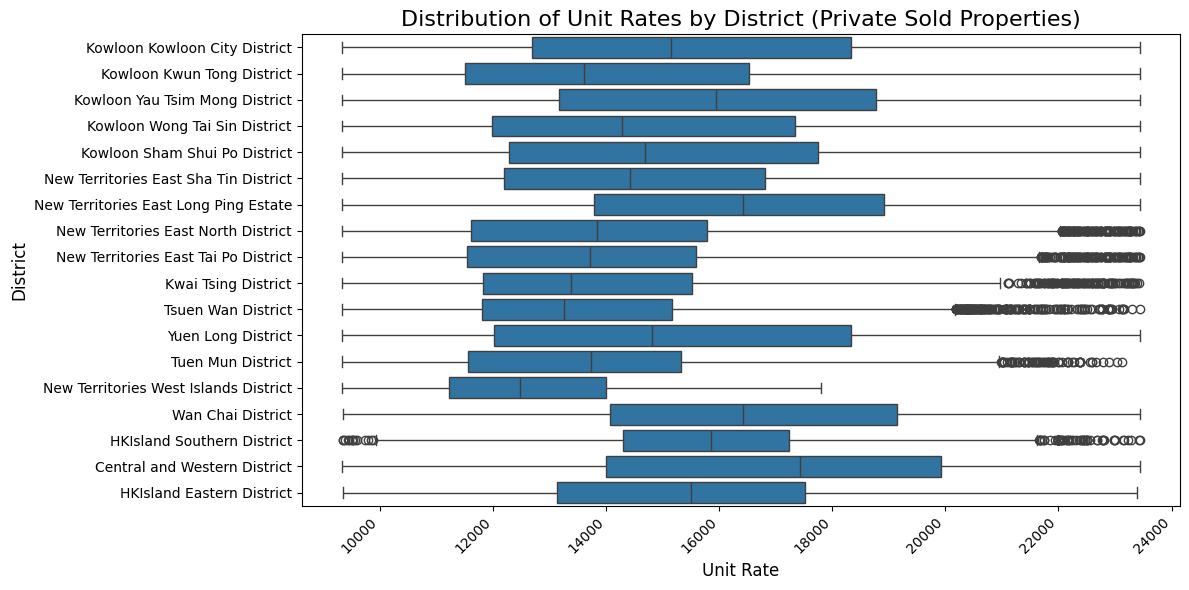

In [ ]:
# Plotting box plot for merged_dataset (replace private_sold with merged_dataset)
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='district', data=merged_dataset)

# Customize the plot
plt.title('Distribution of Unit Rates by District (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## Distribution of Unit Rates by Region

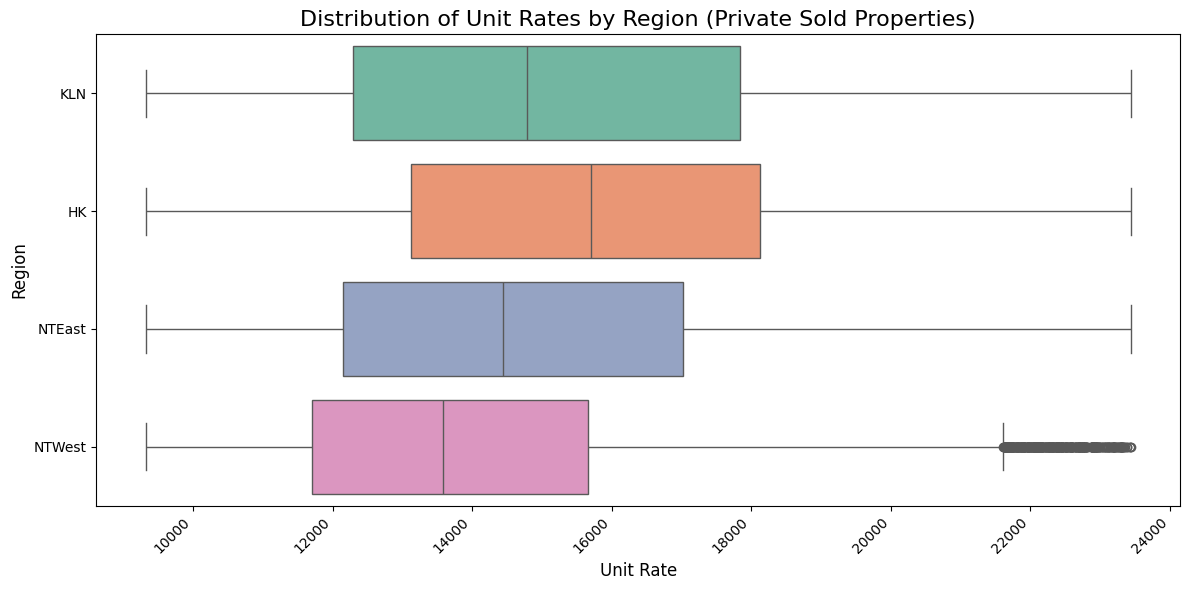

In [ ]:
# Plotting box plot for private sold properties by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='region', data=merged_dataset, palette='Set2')

# Customize the plot
plt.title('Distribution of Unit Rates by Region (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## Number of transactions in the districts for each yearly quarter

<Figure size 1200x600 with 0 Axes>

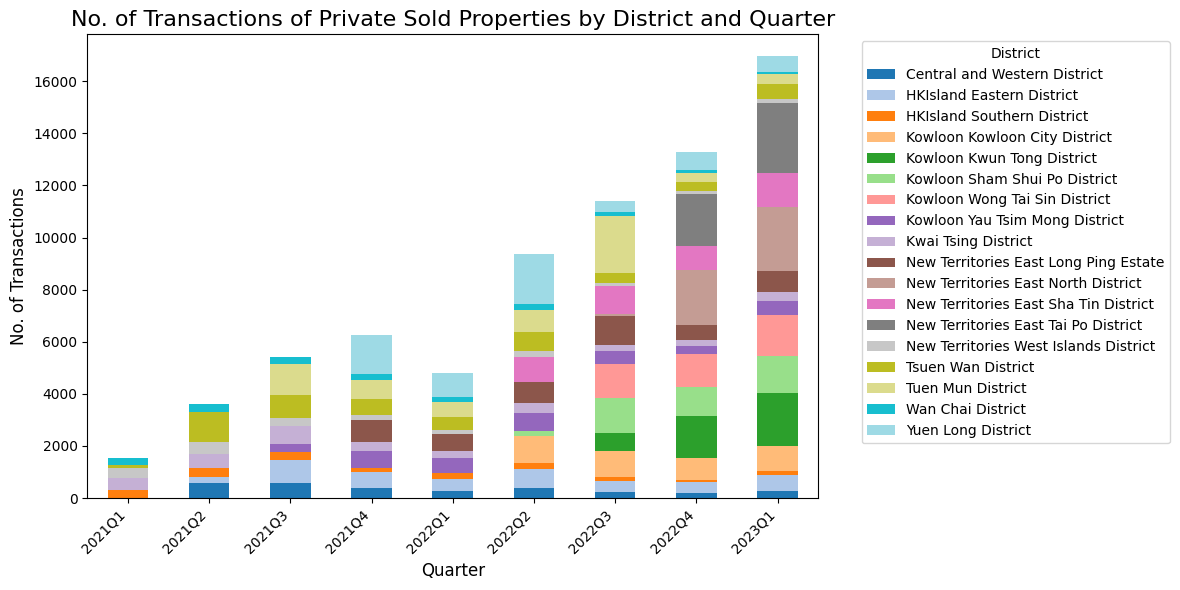

In [ ]:
# Group by YearQuarter and district, then count transactions
tcount_sold_by_district = merged_dataset.groupby(['YearQuarter', 'district']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
tcount_sold_by_district.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by District and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## More EDA for reporting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Beautify matplotlib plots using rcParams
plt.rcParams.update({
    'figure.figsize': (10, 6),             # Set figure size
    'axes.titlesize': 16,                  # Title font size
    'axes.titleweight': 'bold',             # Title font weight
    'axes.labelsize': 14,                  # Axis label font size
    'axes.labelweight': 'bold',             # Axis label font weight
    'axes.grid': True,                     # Show grid
    'grid.alpha': 0.3,                     # Grid transparency
    'grid.linestyle': '--',                # Grid line style
    'xtick.labelsize': 12,                 # X-axis tick label font size
    'ytick.labelsize': 12,                 # Y-axis tick label font size
    'legend.fontsize': 12,                 # Legend font size
    'legend.loc': 'best',                  # Best location for the legend
    'font.family': 'serif',                # Font family
    'font.serif': ['Times New Roman'],     # Serif font for better readability
    'axes.facecolor': '#f0f0f0',           # Background color of the axes
    'figure.facecolor': 'white',           # Background color of the figure
    'savefig.dpi': 300,                    # Resolution of saved figure
    'savefig.transparent': True            # Transparent background for saved figure
})

# Use seaborn's default style for extra improvement
sns.set(style="whitegrid", palette="muted")


###_ Histogram for Saleable Area

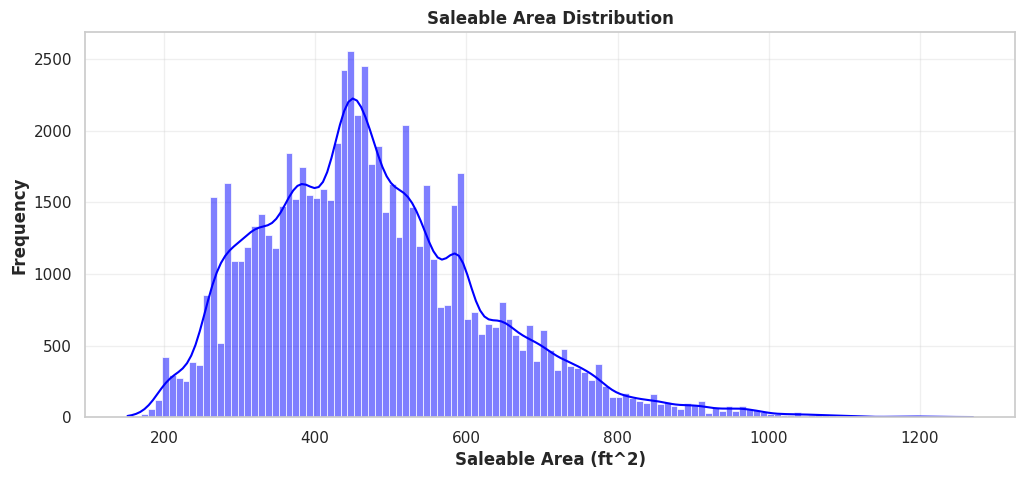

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(merged_dataset['saleable_area(ft^2)'], kde=True, color='blue')
plt.title('Saleable Area Distribution')
plt.xlabel('Saleable Area (ft^2)')
plt.ylabel('Frequency')
plt.show()

### Boxplot for Saleable Area

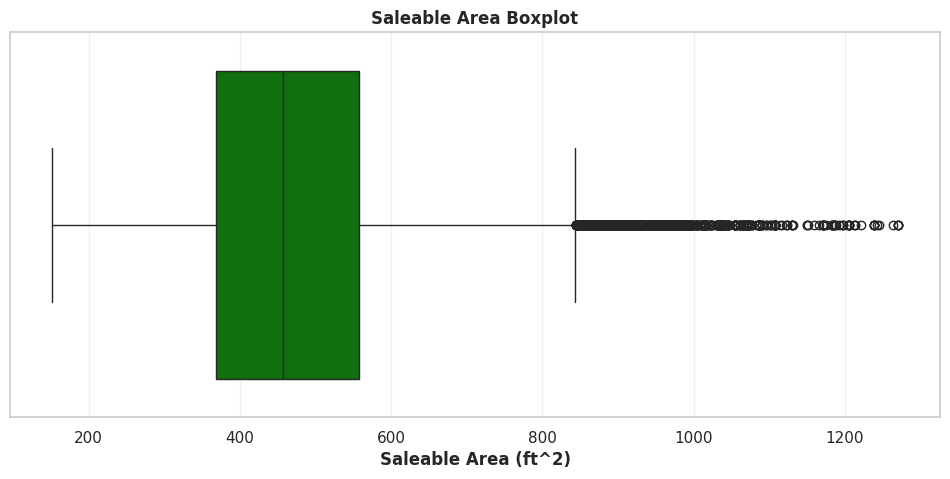

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=merged_dataset['saleable_area(ft^2)'], color='green')
plt.title('Saleable Area Boxplot')
plt.xlabel('Saleable Area (ft^2)')
plt.show()

### Density Plot for Unit Rate

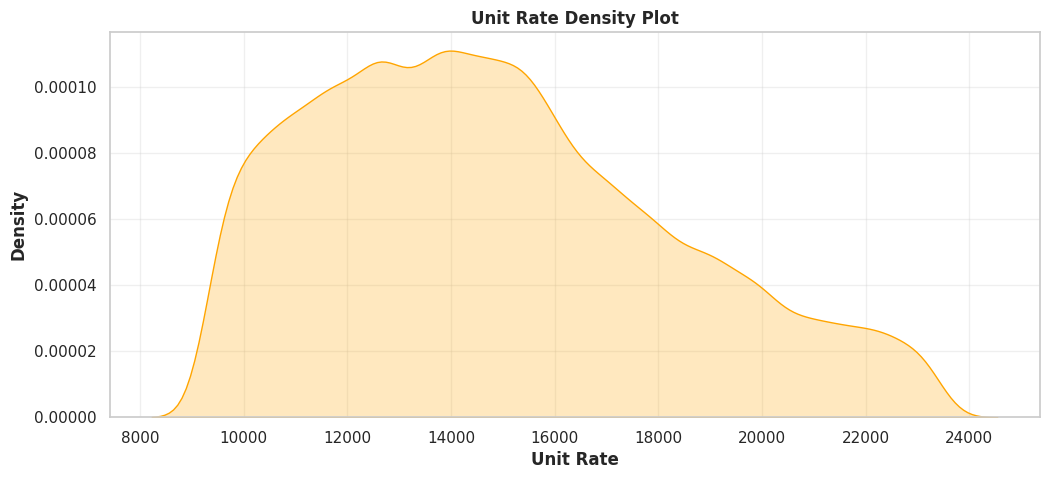

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(merged_dataset['unit_rate'], shade=True, color='orange')
plt.title('Unit Rate Density Plot')
plt.xlabel('Unit Rate')
plt.ylabel('Density')
plt.show()

### Pairplot for Continuous Variables

In [ ]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'GDP', 'HS', 'CPI', 'IR', 'LTV',
       'M3', 'MW', 'PG', 'SD', 'SOLD', 'UR', 'new_price'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

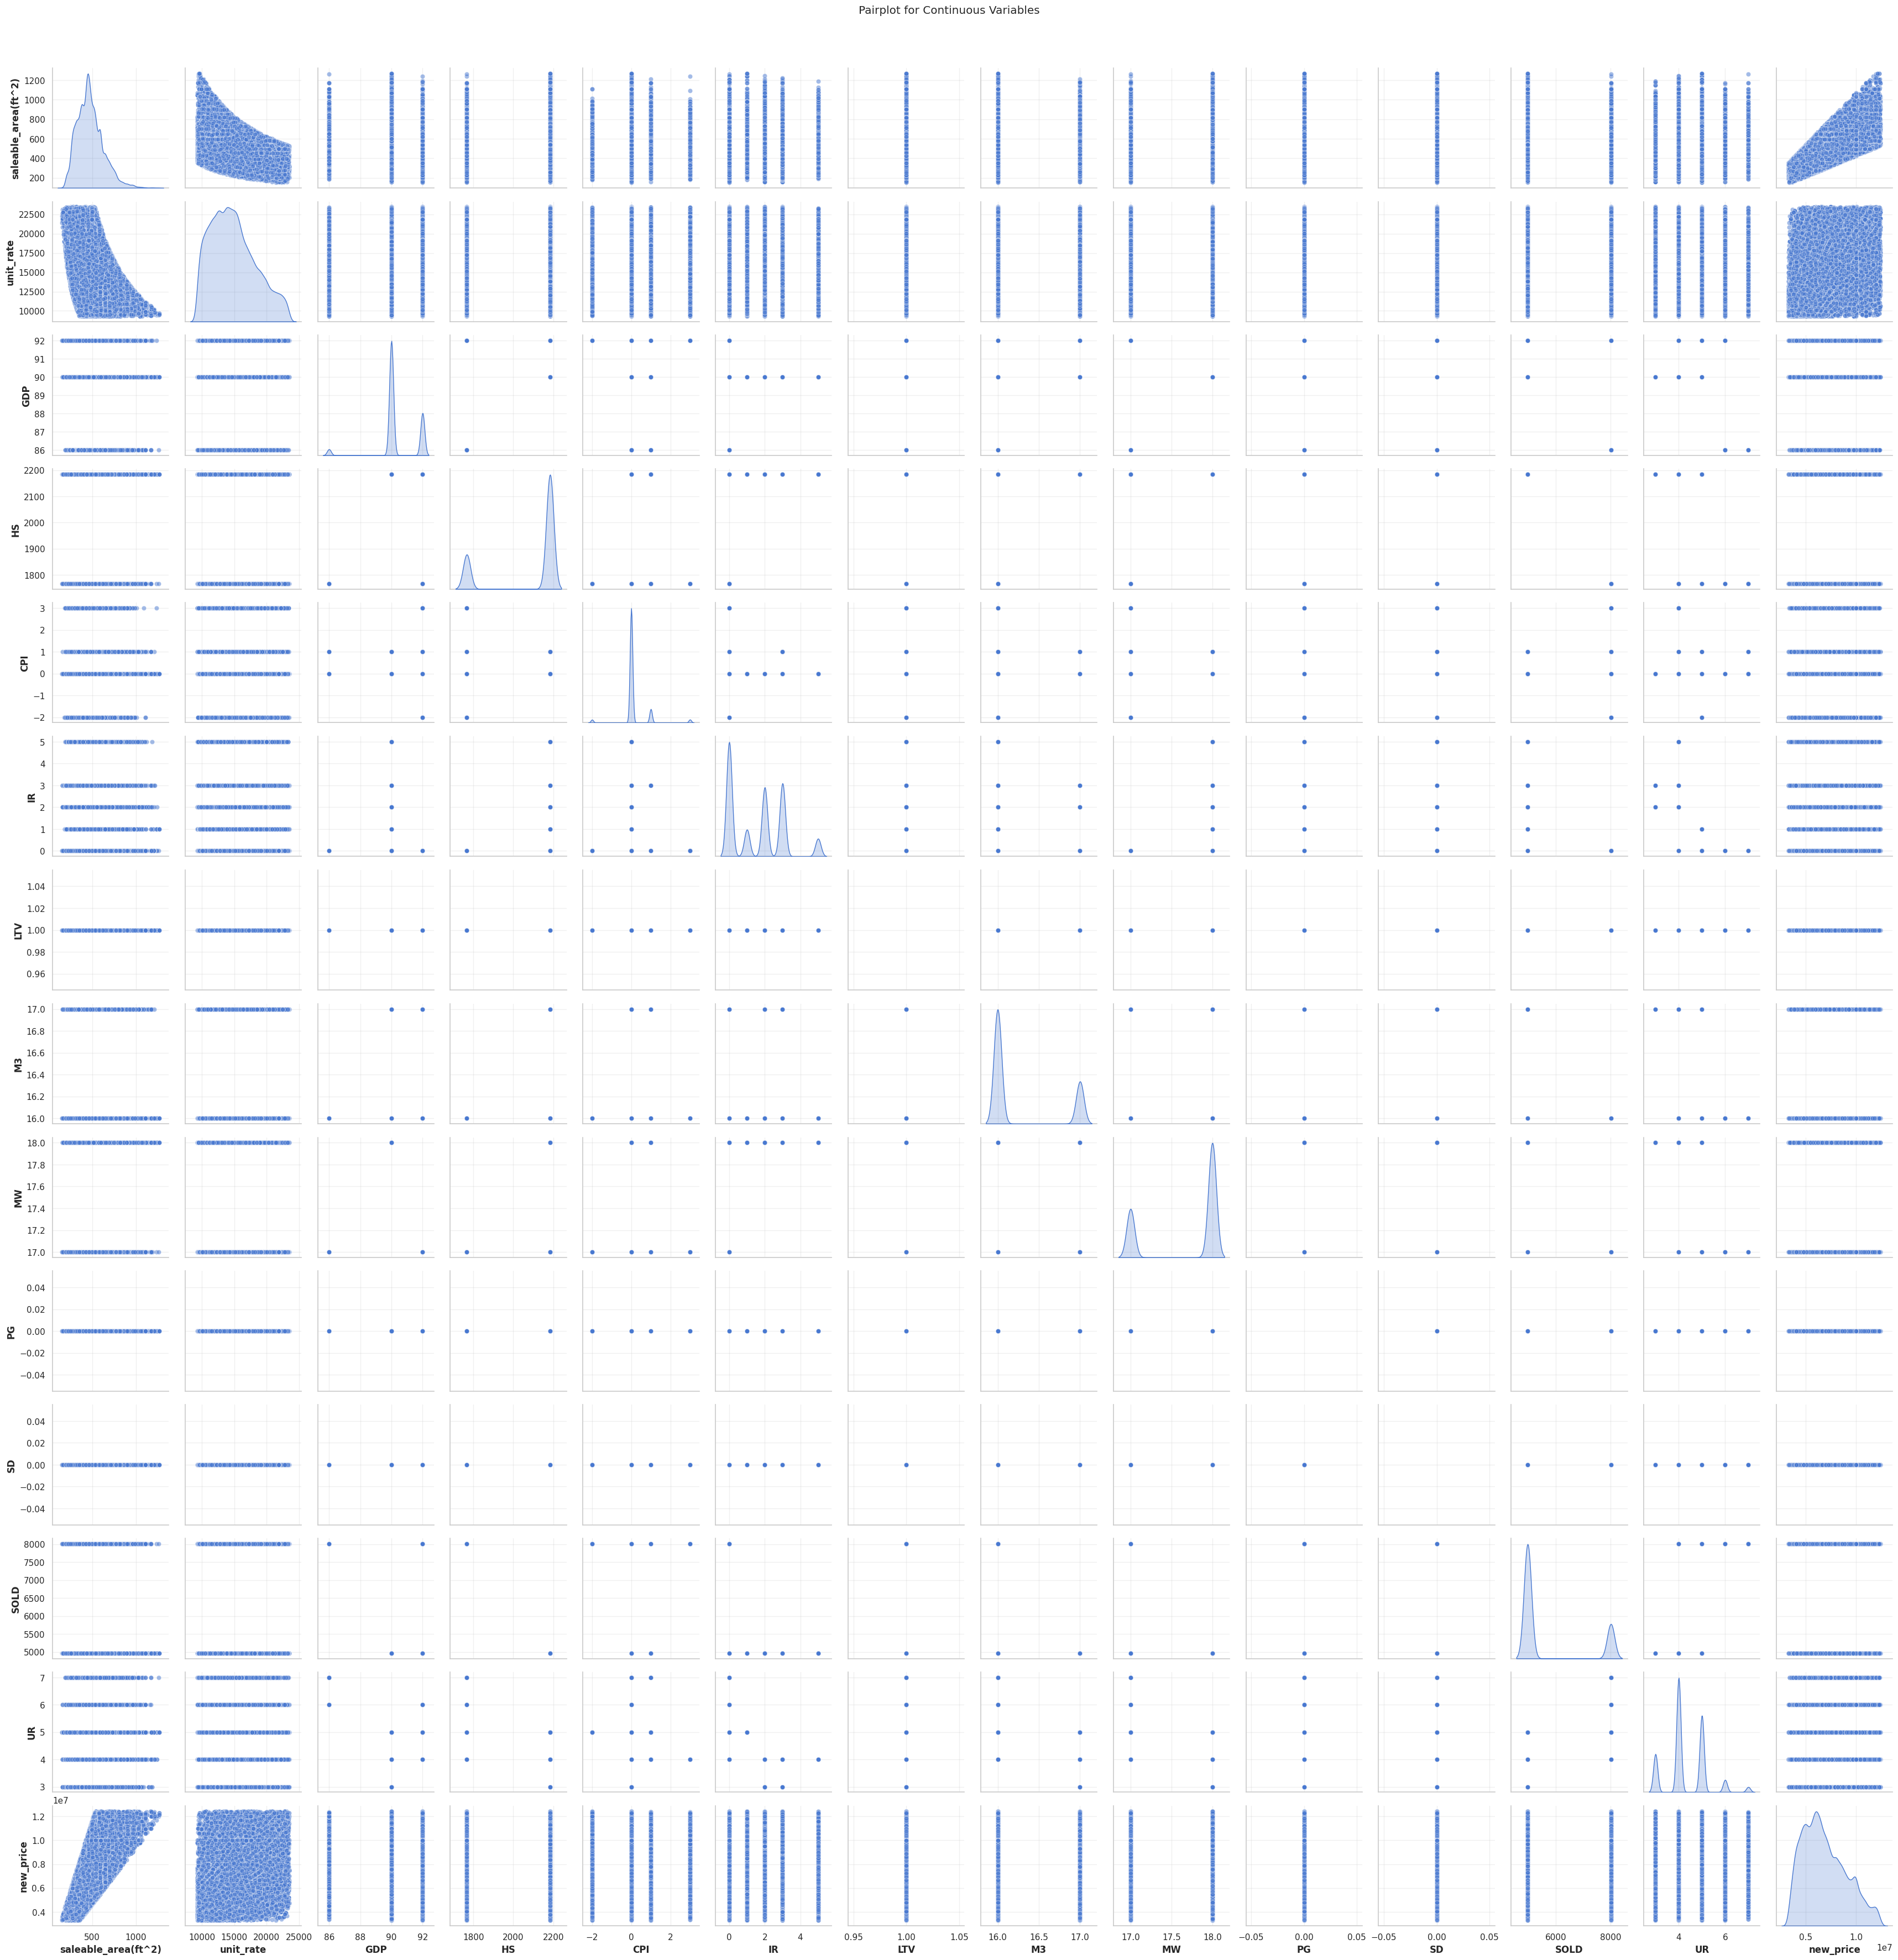

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous columns
continuous_cols = ['saleable_area(ft^2)', 'unit_rate', 'GDP', 'HS', 'CPI', 'IR', 'LTV',
       'M3', 'MW', 'PG', 'SD', 'SOLD', 'UR', 'new_price']

# Check for missing columns
missing_cols = set(continuous_cols) - set(merged_dataset.columns)
if missing_cols:
    print(f"Missing columns in the dataset: {missing_cols}")
    # Remove missing columns from the list
    continuous_cols = [col for col in continuous_cols if col in merged_dataset.columns]

# Ensure all columns are numeric and handle missing values
merged_dataset = merged_dataset[continuous_cols].dropna()  # Drop rows with NaN values
for col in continuous_cols:
    if not pd.api.types.is_numeric_dtype(merged_dataset[col]):
        print(f"Non-numeric column detected: {col}")
        merged_dataset[col] = pd.to_numeric(merged_dataset[col], errors='coerce')  # Convert to numeric

# Pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(merged_dataset, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot for Continuous Variables', y=1.02)
plt.show()

# Bivariate Visualizations

### Scatter Plot of Saleable Area vs Unit Rate

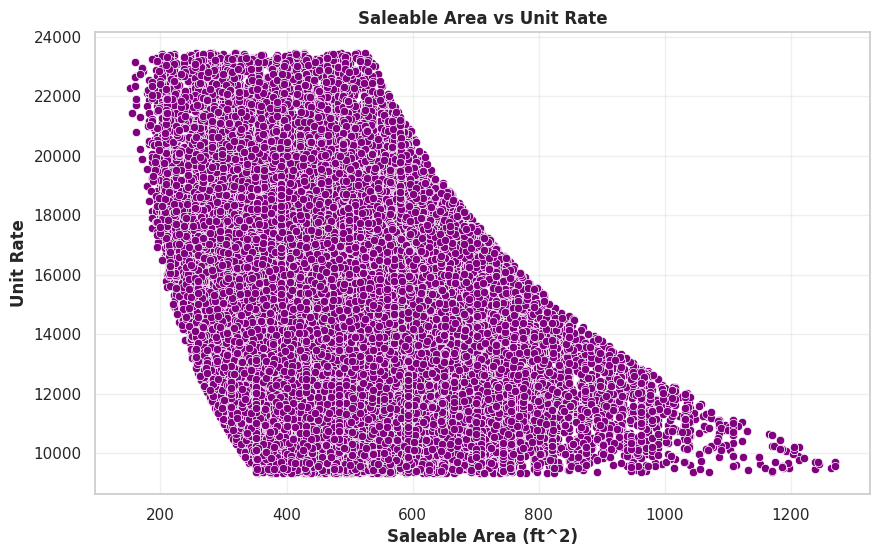

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_dataset['saleable_area(ft^2)'], y=merged_dataset['unit_rate'], color='purple')
plt.title('Saleable Area vs Unit Rate')
plt.xlabel('Saleable Area (ft^2)')
plt.ylabel('Unit Rate')
plt.show()

### Scatter Plot of Floor vs Saleable Area


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   saleable_area(ft^2)  72663 non-null  int64
 1   unit_rate            72663 non-null  int64
 2   GDP                  72663 non-null  int64
 3   HS                   72663 non-null  int64
 4   CPI                  72663 non-null  int64
 5   IR                   72663 non-null  int64
 6   LTV                  72663 non-null  int64
 7   M3                   72663 non-null  int64
 8   MW                   72663 non-null  int64
 9   PG                   72663 non-null  int64
 10  SD                   72663 non-null  int64
 11  SOLD                 72663 non-null  int64
 12  UR                   72663 non-null  int64
 13  new_price            72663 non-null  int64
dtypes: int64(14)
memory usage: 7.8 MB


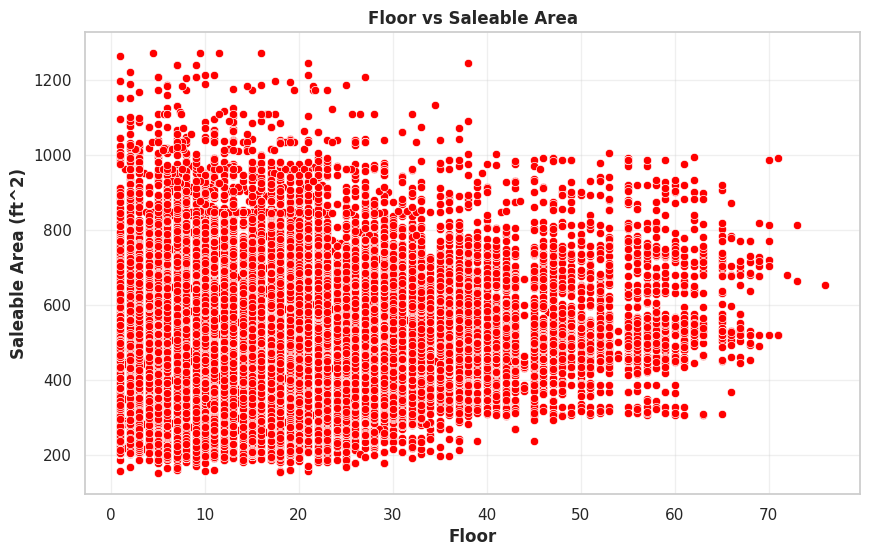

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_dataset['floor'], y=merged_dataset['saleable_area(ft^2)'], color='red')
plt.title('Floor vs Saleable Area')
plt.xlabel('Floor')
plt.ylabel('Saleable Area (ft^2)')
plt.show()

### Boxplot by Property Size

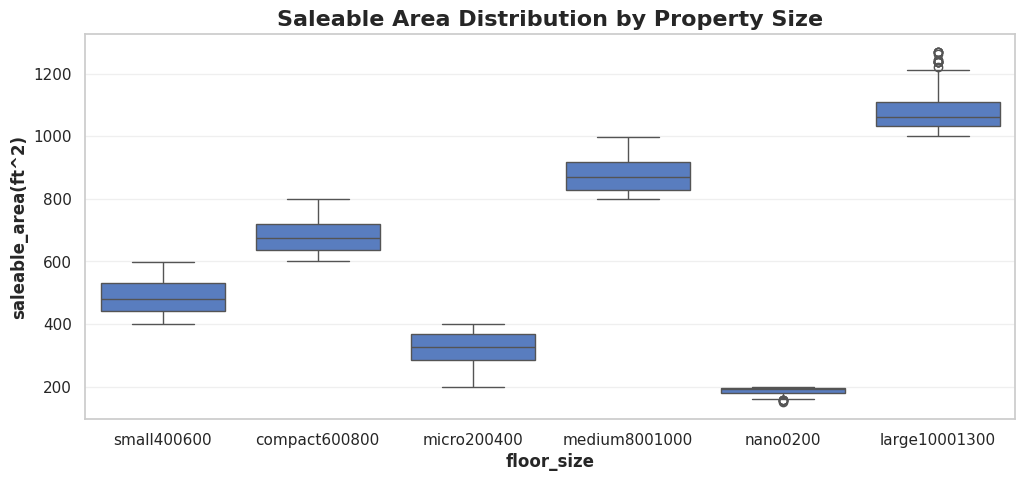

In [ ]:
# Boxplot to show distribution of 'saleable_area(ft^2)' by 'property_size'
plt.figure(figsize=(12, 5))
sns.boxplot(x='floor_size', y='saleable_area(ft^2)', data=merged_dataset)
plt.title('Saleable Area Distribution by Property Size', size=16)
plt.show()


### Scatterplot with Multiple Variables

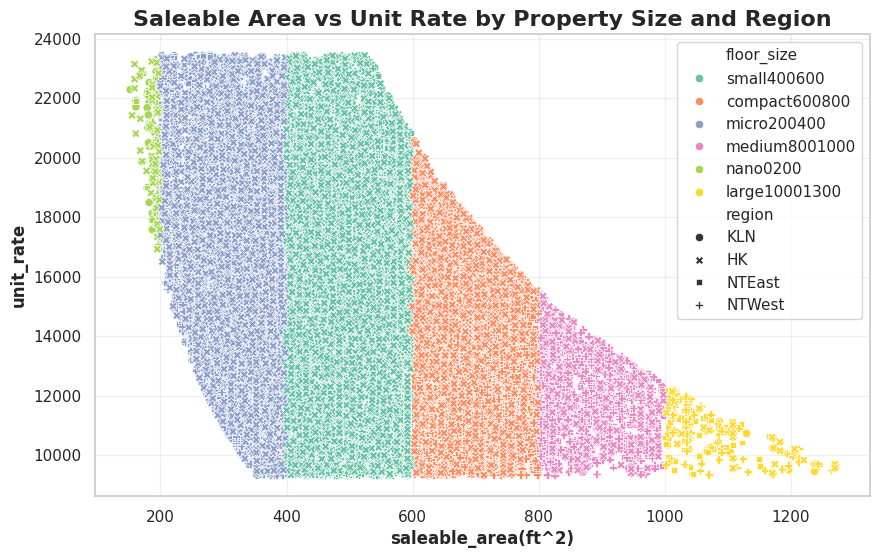

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='saleable_area(ft^2)', y='unit_rate', hue='floor_size', data=merged_dataset, palette='Set2', style='region')
plt.title('Saleable Area vs Unit Rate by Property Size and Region', size=16)
plt.show()

### FacetGrid for Comparison by Region


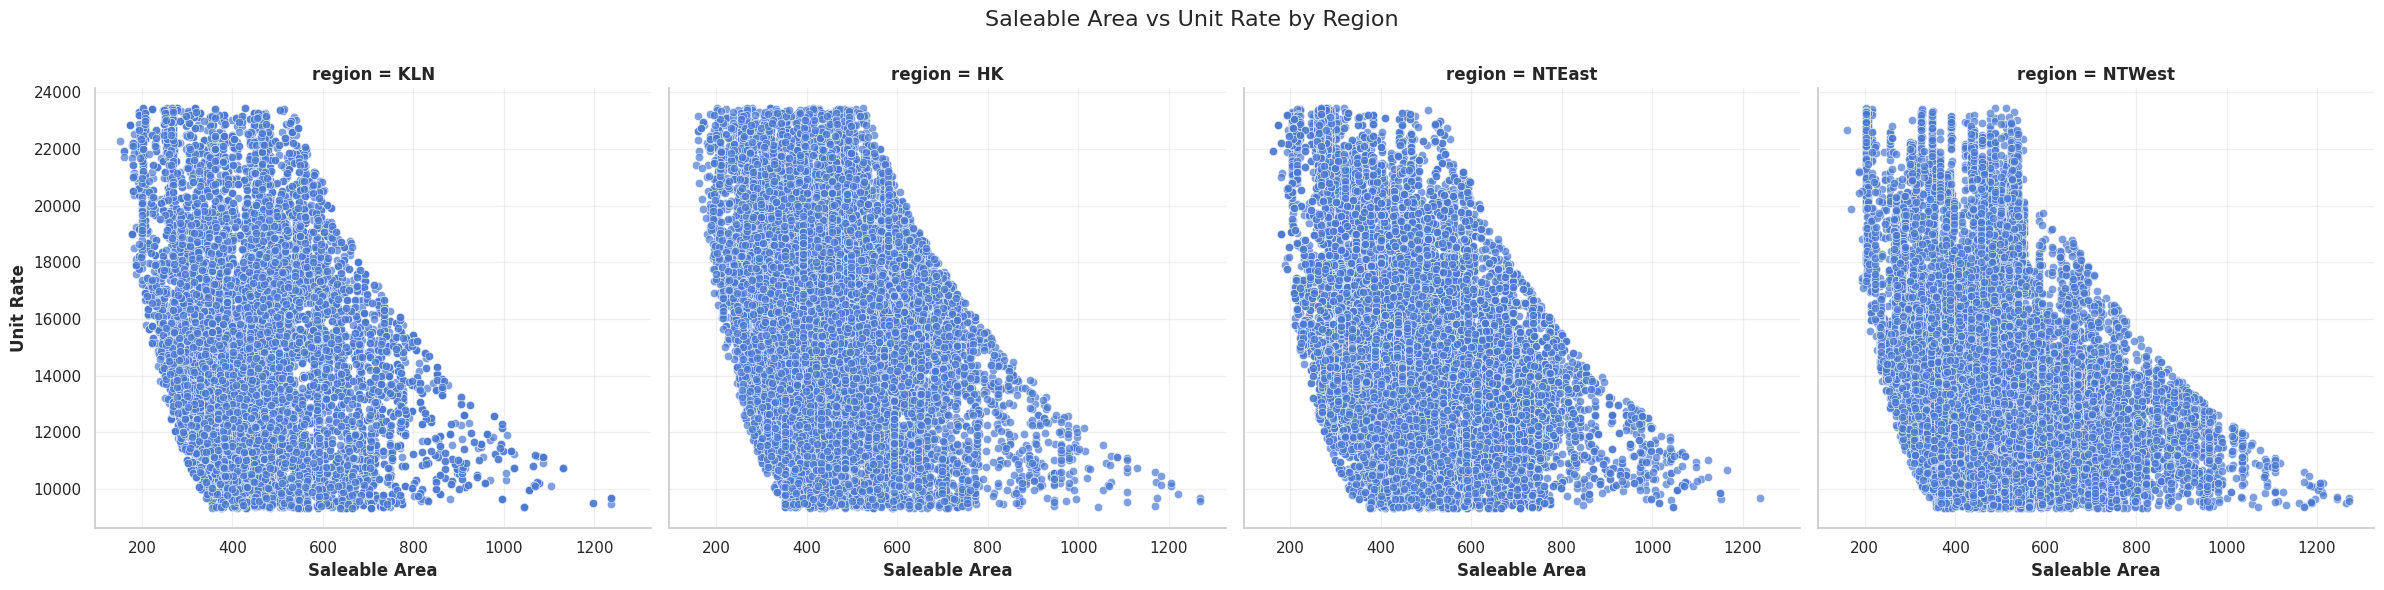

In [ ]:
g = sns.FacetGrid(merged_dataset, col="region", height=6)
g.map(sns.scatterplot, "saleable_area(ft^2)", "unit_rate", alpha=.7)
g.set_axis_labels("Saleable Area", "Unit Rate")
plt.suptitle("Saleable Area vs Unit Rate by Region", size=16)
plt.subplots_adjust(top=0.85)
plt.show()


### 3D Scatter Plot

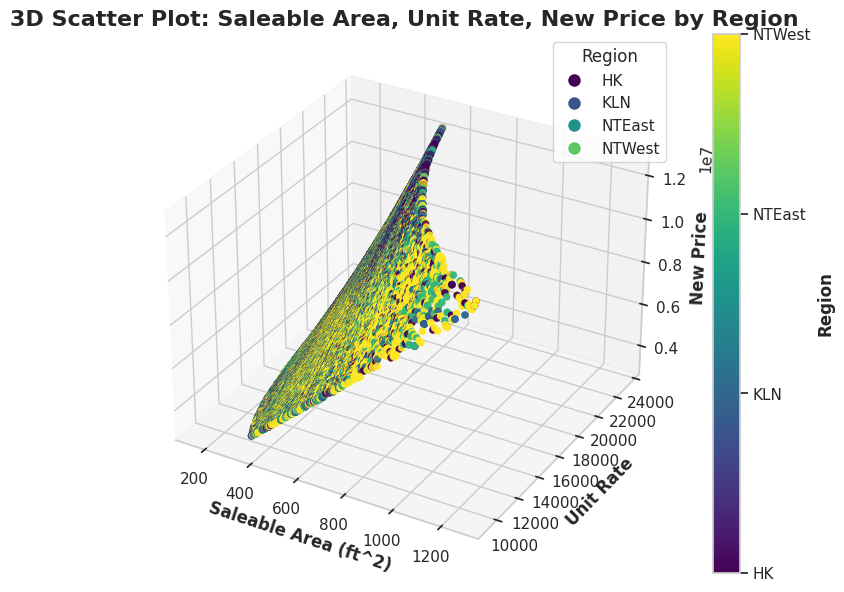

In [ ]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Convert 'region' to categorical and map categories to colors
merged_dataset['region_cat'] = pd.Categorical(merged_dataset['region'])
merged_dataset['region_color'] = merged_dataset['region_cat'].cat.codes

# Prepare 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data with region_color for coloring
scatter = ax.scatter(merged_dataset['saleable_area(ft^2)'], merged_dataset['unit_rate'], merged_dataset['new_price'],
                     c=merged_dataset['region_color'], cmap='viridis')

# Labels and Title
ax.set_xlabel('Saleable Area (ft^2)')
ax.set_ylabel('Unit Rate')
ax.set_zlabel('New Price')
plt.title("3D Scatter Plot: Saleable Area, Unit Rate, New Price by Region", size=16)

# Add color bar for categorical region
colorbar = plt.colorbar(scatter, ax=ax, label='Region')
colorbar.set_ticks([0, 1, 2, 3])  # Set appropriate ticks based on unique region categories
colorbar.set_ticklabels(merged_dataset['region_cat'].cat.categories)  # Label ticks with region names

# Add a legend
region_labels = merged_dataset['region_cat'].cat.categories
region_colors = [scatter.cmap(i / float(len(region_labels))) for i in range(len(region_labels))]

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in region_colors]

# Create legend with region names
ax.legend(handles, region_labels, title="Region", loc="best")

plt.show()


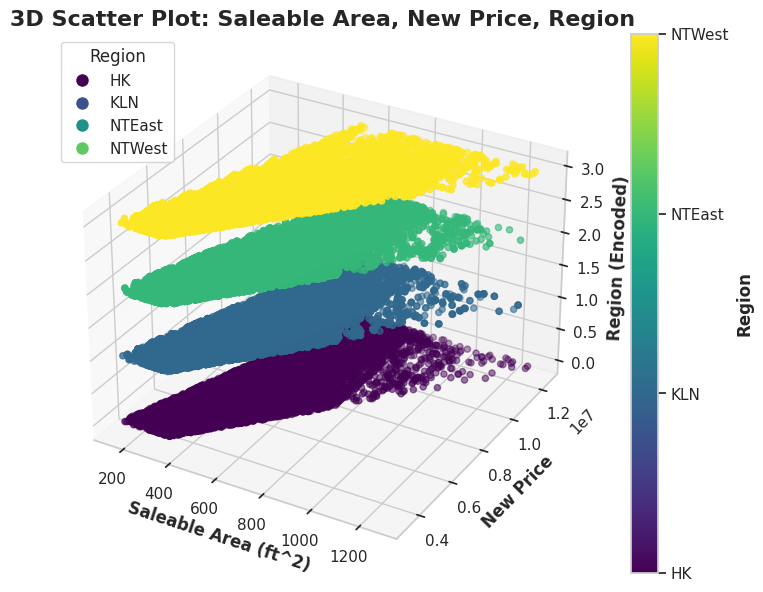

In [ ]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Convert 'region' to categorical and map categories to colors
merged_dataset['region_cat'] = pd.Categorical(merged_dataset['region'])
merged_dataset['region_color'] = merged_dataset['region_cat'].cat.codes

# Prepare 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data with region_color for coloring
scatter = ax.scatter(
    merged_dataset['saleable_area(ft^2)'],
    merged_dataset['new_price'],
    merged_dataset['region_color'],  # Use region_color as the Z-axis
    c=merged_dataset['region_color'],
    cmap='viridis'
)

# Labels and Title
ax.set_xlabel('Saleable Area (ft^2)')
ax.set_ylabel('New Price')
ax.set_zlabel('Region (Encoded)')
plt.title("3D Scatter Plot: Saleable Area, New Price, Region", size=16)

# Add color bar for categorical region
colorbar = plt.colorbar(scatter, ax=ax, label='Region')
colorbar.set_ticks(range(len(merged_dataset['region_cat'].cat.categories)))  # Set appropriate ticks for each region
colorbar.set_ticklabels(merged_dataset['region_cat'].cat.categories)  # Label ticks with region names

# Add a legend
region_labels = merged_dataset['region_cat'].cat.categories
region_colors = [scatter.cmap(i / float(len(region_labels))) for i in range(len(region_labels))]

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in region_colors]

# Create legend with region names
ax.legend(handles, region_labels, title="Region", loc="best")

plt.show()

## Save the Dataframe

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   saleable_area(ft^2)  72663 non-null  int64   
 1   unit_rate            72663 non-null  int64   
 2   district             72663 non-null  object  
 3   floor                72663 non-null  float64 
 4   CPI                  72663 non-null  int64   
 5   PC                   72663 non-null  int64   
 6   IR                   72663 non-null  int64   
 7   MW                   72663 non-null  int64   
 8   M3                   72663 non-null  int64   
 9   SD                   72663 non-null  int64   
 10  UR                   72663 non-null  int64   
 11  GDP                  72663 non-null  int64   
 12  CI                   72663 non-null  int64   
 13  HSI                  72663 non-null  int64   
 14  LTV                  72663 non-null  int64   
 15  HS                 

In [ ]:
# Drop the specified columns from merged_dataset
merged_dataset = merged_dataset.drop(columns=['region_cat', 'region_color'], errors='ignore')

# Display the first few rows of the modified dataset
print(merged_dataset.head())

   saleable_area(ft^2)  unit_rate                       district  floor  CPI  \
0                  423      15792  Kowloon Kowloon City District   22.0    0   
1                  761      15857  Kowloon Kowloon City District   12.0    0   
2                  320      13717  Kowloon Kowloon City District   12.0    0   
3                  519      16541  Kowloon Kowloon City District   29.0    0   
4                  699      14721  Kowloon Kowloon City District   24.0    0   

    PC  IR  MW  M3  SD  UR  GDP  CI    HSI  LTV    HS  SOLD  PG  LS  \
0  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
1  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
2  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
3  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
4  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   

  FormattedDate  new_price YearQuarter region  floor_height     floor_size  
0    2023-03-08

In [ ]:
merged_dataset.shape

(72663, 25)

In [ ]:
# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Std_Datasetv3.csv', index=False)

In [ ]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv3.csv'

# Save the file
merged_dataset.to_csv(file_path, index=False)

# Verify if the file exists
if os.path.exists(file_path):
    print(f"File 'Std_Datasetv3.csv' has been saved successfully!")
    print(f"Full file path: {file_path}")
else:
    print(f"File 'Std_Datasetv3.csv' was not found in the directory!")

# Optionally unmount and remount Google Drive
drive.flush_and_unmount()
print("Drive unmounted. Please refresh Google Drive and remount if necessary.")

Mounted at /content/drive
File 'Std_Datasetv3.csv' has been saved successfully!
Full file path: /content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv3.csv
Drive unmounted. Please refresh Google Drive and remount if necessary.
